<a href="https://colab.research.google.com/github/vinayakkini101/study-of-toxic-release-inventory/blob/dev_Pragati/Toxic_Release_Inventory_with_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls "/content/drive/My Drive/255_Dataset/basic_data_files.csv"

'/content/drive/My Drive/255_Dataset/basic_data_files.csv'


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import colors

In [7]:

df = pd.read_csv('/content/drive/My Drive/255_Dataset/basic_data_files.csv'
                      , sep=',' ,nrows=3)

In [8]:
df.columns[90:109]
df = df.dropna()


**Load all rows with only selected columns**

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/255_Dataset/basic_data_files.csv'
                      , sep=',' 
                      , usecols=['YEAR', 'TRI_FACILITY_ID', 'FACILITY_NAME', 'LATITUDE', 'LONGITUDE','ST','CITY','FEDERAL_FACILITY',
                                 'INDUSTRY_SECTOR','CHEMICAL','CLEAR_AIR_ACT_CHEMICAL','CAS_#/COMPOUND_ID', 'CLASSIFICATION', 'METAL', 'METAL_CATEGORY',
                                 'CARCINOGEN','5.1_FUGITIVE_AIR', '5.2_STACK_AIR','5.3_WATER','5.4_UNDERGROUND','5.5.1_LANDFILLS',
                                 '5.5.2_LAND_TREATMENT','5.5.3_SURFACE_IMPOUNDMENT', '5.5.4_OTHER_DISPOSAL','ON-SITE_RELEASE_TOTAL','OFF-SITE_RELEASE_TOTAL',
                                 '8.4_RECYCLING_ON-SITE', ' 8.5_RECYCLING_OFF-SITE','8.6_TREATMENT_ON-SITE', '8.7_TREATMENT_OFF-SITE',
                                 'OFF-SITE_RECOVERY_TOTAL','OFF-SITE_TREATED_TOTAL','TOTAL_RELEASES','PROD._WASTE_(8.1_THRU_8.7)','PARENT_COMPANY_NAME'],
                 nrows = 2504876)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,11,12,35,39,40,41,42,45,48,49,52,53,74,83,90,91,99,100,101,102,103) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,TRI_FACILITY_ID,FACILITY_NAME,CITY,ST,LATITUDE,LONGITUDE,FEDERAL_FACILITY,INDUSTRY_SECTOR,CHEMICAL,CAS_#/COMPOUND_ID,CLEAR_AIR_ACT_CHEMICAL,CLASSIFICATION,METAL,METAL_CATEGORY,CARCINOGEN,5.1_FUGITIVE_AIR,5.2_STACK_AIR,5.3_WATER,5.4_UNDERGROUND,5.5.1_LANDFILLS,5.5.2_LAND_TREATMENT,5.5.3_SURFACE_IMPOUNDMENT,5.5.4_OTHER_DISPOSAL,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,OFF-SITE_RECOVERY_TOTAL,OFF-SITE_TREATED_TOTAL,TOTAL_RELEASES,8.4_RECYCLING_ON-SITE,8.5_RECYCLING_OFF-SITE,8.6_TREATMENT_ON-SITE,8.7_TREATMENT_OFF-SITE,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME
0,2016,46552DCTLT30350,EDCOAT LLC,NEW CARLISLE,IN,41.6934,-86.4552,NO,Fabricated Metals,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,N090,YES,TRI,YES,1,NO,0,0,0,0,0,0,0,0,0,1170.32,0,0,1170.41,0,0,0,0,1170.32,NaN
1,2016,01950NNSPC3MALC,UNION SPECIALTIES INC,NEWBURYPORT,MA,42.7964,-70.8904,NO,Chemicals,CERTAIN GLYCOL ETHERS,N230,YES,TRI,NO,0,NO,1,17,0,0,0,0,0,0,18,0,0,0,18,0,0,0,0,18,NaN
2,2016,44691CRGLL1203T,CARGILL ANIMAL NUTRITION,WOOSTER,OH,40.7847,-81.9396,NO,Food,ZINC COMPOUNDS,N982,NO,TRI,YES,1,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CARGILL INC
3,2016,02745CSHNT215DU,ACUSHNET CO BALL PLANT III,NEW BEDFORD,MA,41.7254,-70.9552,NO,Miscellaneous Manufacturing,DIISOCYANATES,N120,YES,TRI,NO,0,NO,0,0,0,0,0,0,0,0,0,0,2191,106,0,0,0,0,106,2297,ACUSHNET HOLDINGS CORP
4,2016,30050CLRXC17LAK,CLOROX PRODUCTS MANUFACTURING CO,FOREST PARK,GA,33.6272,-84.3868,NO,Chemicals,CERTAIN GLYCOL ETHERS,N230,YES,TRI,NO,0,NO,5,5,0,0,0,0,0,0,10,20,0,230,50,0,0,0,230,260,THE CLOROX CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504871,1993,44256BLSSL900WE,FBC CHEMICAL MEDINA,MEDINA,OH,41.1361,-81.8926,NO,Primary Metals,CHROMIUM,007440473,YES,TRI,YES,1,YES,0,2,0,0,0,0,0,0,2,0,0,0,2,0,2100,0,0,2102,FBC CHEMICAL CORP
2504872,1993,01970PRKRB190BR,PARKER BROTHERS,SALEM,MA,42.5249,-70.8937,NO,Miscellaneous Manufacturing,TOLUENE DIISOCYANATE (MIXED ISOMERS),026471625,NO,TRI,NO,0,YES,0,5,0,0,0,0,0,0,5,0,0,0,5,0,0,0,0,1,HASBRO INC
2504873,1993,78758XTLCR2525B,XETEL CORP,AUSTIN,TX,30.3922,-97.7181,NO,Computers and Electronic Products,FREON 113,000076131,NO,TRI,NO,0,NO,0,27000,0,0,0,0,0,0,27000,0,0,0,27000,0,2400,0,0,29400,ROHM CORP
2504874,1993,94544DVSWL31775,DAVIS WIRE CORP,HAYWARD,CA,37.611,-122.045,NO,Primary Metals,"SULFURIC ACID (1994 AND AFTER ACID AEROSOLS"" O...",007664939,NO,TRI,NO,0,NO,5,0,0,0,0,0,0,0,5,0,0,0,5,386100,0,793000,0,1.17911e+06,HEICO AQUISITIONS


In [10]:
#df[2548769:2549000]

In [11]:
sum(df['YEAR'].map(type) != int)

237568

In [12]:
group_by_year = df.groupby(['YEAR'])
group_by_year.size()

YEAR
1993     30892
1994     73728
1995     65536
1996     73728
1997     65536
1998     81920
1999     81920
2000     81920
2001     90112
2002     90112
2003     81920
2004     90112
2005     81920
2006     81920
2007     81920
2008     73728
2009     73728
2010     73728
2011    147456
2012    163840
2013    147456
2014    147456
2015    147456
2016    139264
1993      8177
1994      4055
1995     12164
1996      1956
1997     10126
1998      8880
1999      4959
2000     12216
2001      8488
2002      5983
2003     12304
2004      2022
2005      9960
2006      8901
2007      7041
2008     13094
2009      7868
2010      8348
2011     17306
2012      1348
2013     18234
2014     19122
2015     15540
2016     19446
YEAR        30
dtype: int64

In [13]:
df = df.drop(df[df.YEAR == 'YEAR'].index)

In [14]:
sum(df['YEAR'].map(type) != int)

237538

In [15]:
#df[793556]
df['YEAR'] = pd.to_numeric(df['YEAR'])

In [16]:
sum(df['YEAR'].map(type) != int)

0

In [17]:
sum(df['YEAR'].isnull()==True)

0

In [18]:
from scipy import stats

most_freq_year, count = stats.mode(df['YEAR'])

year_mode = int(most_freq_year) # which age occurs most frequently in the dataset
print(year_mode)

2014


In [19]:
group_by_year = df.groupby(['YEAR'])
group_by_year.size()

YEAR
1993     39069
1994     77783
1995     77700
1996     75684
1997     75662
1998     90800
1999     86879
2000     94136
2001     98600
2002     96095
2003     94224
2004     92134
2005     91880
2006     90821
2007     88961
2008     86822
2009     81596
2010     82076
2011    164762
2012    165188
2013    165690
2014    166578
2015    162996
2016    158710
dtype: int64

In [20]:
df = df.drop(df[df.YEAR <2007].index)

In [21]:
group_by_year = df.groupby(['YEAR'])
group_by_year.size()

YEAR
2007     88961
2008     86822
2009     81596
2010     82076
2011    164762
2012    165188
2013    165690
2014    166578
2015    162996
2016    158710
dtype: int64

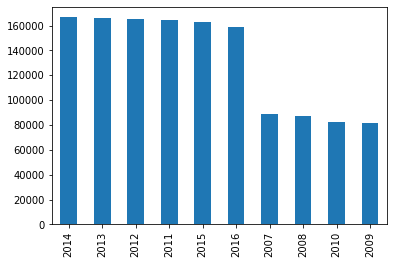

In [22]:
df.YEAR.value_counts().plot.bar()


In [23]:
sum(df['LATITUDE'].map(type) == str)


127235

In [24]:
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'])
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'])

In [25]:
type(df['LATITUDE'][4])

numpy.float64

In [26]:
sum(df['FACILITY_NAME'].map(type) == str)


1323379

In [27]:
group_by_year = df.groupby(['METAL'])
group_by_year.size()

METAL
NO     819308
YES    504071
dtype: int64

In [28]:
d = {'YES': True, 'NO': False}
df['METAL'] = df['METAL'].map(d)
df['FEDERAL_FACILITY'] = df['FEDERAL_FACILITY'].map(d)
df['CLEAR_AIR_ACT_CHEMICAL'] = df['CLEAR_AIR_ACT_CHEMICAL'].map(d)
df['CARCINOGEN'] = df['CARCINOGEN'].map(d)

In [29]:
group_by_year = df.groupby(['CLASSIFICATION'])
group_by_year.size()

CLASSIFICATION
Dioxin      16791
PBT        215786
TRI       1090802
dtype: int64

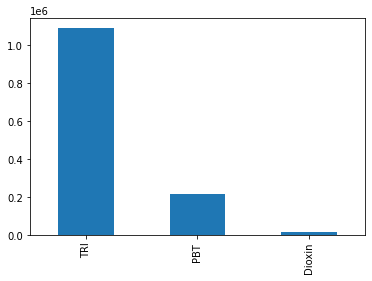

In [30]:
df.CLASSIFICATION.value_counts().plot.bar()


In [31]:
sum(df['PARENT_COMPANY_NAME'].isna() == True)

219283

In [32]:
sum(df['CITY'].isna() == True)

0

In [33]:
df = df.drop(df[df.PARENT_COMPANY_NAME.isna() ==True].index)

In [34]:
sum(df['PARENT_COMPANY_NAME'].isna() == True)

0

In [35]:
group_by_year = df.groupby(['PARENT_COMPANY_NAME'])
group_by_year.size()

PARENT_COMPANY_NAME
3A COMPOSITES USA INC                      42
3M                                          5
3M CO                                    4739
3P HOLDINGS INC                            78
4-D CORROSION CONTROL SPECIALISTS INC      10
                                         ... 
ZOLTEK CORP                                 6
ZOLTEK COS INC.                            24
ZSCHIMMER & SCHWARZ                        76
ZSCHIMMER & SCHWARZ INC                    92
ZTM INC.                                    8
Length: 6973, dtype: int64

In [36]:

group_by_year = df.groupby(['METAL_CATEGORY'])
group_by_year.size()

METAL_CATEGORY
0    600067
1    368420
2     10095
3     12386
4      6254
0     64283
1     39439
2      1066
3      1370
4       716
dtype: int64

In [37]:
df['METAL_CATEGORY'] = pd.to_numeric(df['METAL_CATEGORY'])


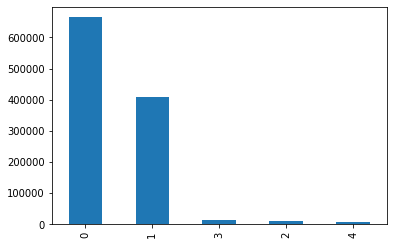

In [38]:
df.METAL_CATEGORY.value_counts().plot.bar()


In [39]:
df['8.4_RECYCLING_ON-SITE'].describe()

count     1104096.0
unique      25814.0
top             0.0
freq       939507.0
Name: 8.4_RECYCLING_ON-SITE, dtype: float64

In [40]:
df[' 8.5_RECYCLING_OFF-SITE'].describe()

count     1104096.0
unique      79513.0
top             0.0
freq       772398.0
Name:  8.5_RECYCLING_OFF-SITE, dtype: float64

In [41]:
#Types of chemicals 
group_by_year = df.groupby(['CHEMICAL'])
group_by_year.size()

CHEMICAL
1,1,1,2-TETRACHLORO-2-FLUOROETHANE        3
1,1,1,2-TETRACHLOROETHANE               171
1,1,1-TRICHLOROETHANE                   427
1,1,2,2-TETRACHLORO-1-FLUOROETHANE       10
1,1,2,2-TETRACHLOROETHANE               341
                                      ...  
WARFARIN AND SALTS                       83
XYLENE (MIXED ISOMERS)                28328
ZINC (FUME OR DUST)                    2807
ZINC COMPOUNDS                        42000
ZINEB                                    12
Length: 551, dtype: int64

In [42]:
df['CHEMICAL'][1010]

'COPPER'

In [43]:
#Types of metals 
group_by_year = df.groupby(['METAL_CATEGORY'])
group_by_year.size()

METAL_CATEGORY
0    664350
1    407859
2     11161
3     13756
4      6970
dtype: int64

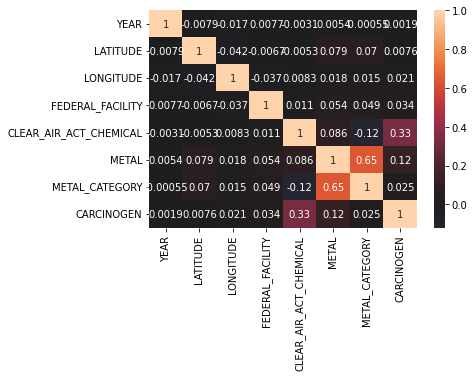

In [44]:
import seaborn as sns
#correlation matrix
corr = df.corr()
#cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.heatmap(corr,annot=True, center=0)

In [45]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['TRI_FACILITY_ID', 'FACILITY_NAME', 'CITY', 'ST', 'INDUSTRY_SECTOR', 'CHEMICAL', 'CAS_#/COMPOUND_ID', 'CLASSIFICATION', '5.1_FUGITIVE_AIR', '5.2_STACK_AIR', '5.3_WATER', '5.4_UNDERGROUND', '5.5.1_LANDFILLS', '5.5.2_LAND_TREATMENT', '5.5.3_SURFACE_IMPOUNDMENT', '5.5.4_OTHER_DISPOSAL', 'ON-SITE_RELEASE_TOTAL', 'OFF-SITE_RELEASE_TOTAL', 'OFF-SITE_RECOVERY_TOTAL', 'OFF-SITE_TREATED_TOTAL', 'TOTAL_RELEASES', '8.4_RECYCLING_ON-SITE', ' 8.5_RECYCLING_OFF-SITE', '8.6_TREATMENT_ON-SITE', '8.7_TREATMENT_OFF-SITE', 'PROD._WASTE_(8.1_THRU_8.7)', 'PARENT_COMPANY_NAME']


In [46]:
#subset for identifying hazardous chemicals
subset_df1 = df[['CLEAR_AIR_ACT_CHEMICAL', 'METAL_CATEGORY', 'CARCINOGEN']]


In [47]:
# importing necessary libraries

!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(subset_df1['METAL_CATEGORY'].values.reshape(-1,1)).toarray()
X


array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [49]:
#To add this back into the original dataframe 
index_values = subset_df1.index
dfOneHot = pd.DataFrame(X, columns = ["MCAT_"+str(int(i)) for i in range(X.shape[1])],  index = index_values) 
dfOneHot

,MCAT_0,MCAT_1,MCAT_2,MCAT_3,MCAT_4
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1323389,0.0,1.0,0.0,0.0,0.0
1323391,1.0,0.0,0.0,0.0,0.0
1323392,1.0,0.0,0.0,0.0,0.0
1323393,1.0,0.0,0.0,0.0,0.0


In [50]:
df2 = pd.concat([subset_df1, dfOneHot], axis=1).reindex(subset_df1.index)
df2

,CLEAR_AIR_ACT_CHEMICAL,METAL_CATEGORY,CARCINOGEN,MCAT_0,MCAT_1,MCAT_2,MCAT_3,MCAT_4
2,False,1,False,0.0,1.0,0.0,0.0,0.0
3,True,0,False,1.0,0.0,0.0,0.0,0.0
4,True,0,False,1.0,0.0,0.0,0.0,0.0
6,True,1,False,0.0,1.0,0.0,0.0,0.0
7,False,0,False,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1323389,True,1,True,0.0,1.0,0.0,0.0,0.0
1323391,True,0,False,1.0,0.0,0.0,0.0,0.0
1323392,True,0,False,1.0,0.0,0.0,0.0,0.0
1323393,False,0,False,1.0,0.0,0.0,0.0,0.0


In [51]:
#droping the country column 
df2= df2.drop(['METAL_CATEGORY'], axis=1) 
#printing to verify 
print(df2.head())

   CLEAR_AIR_ACT_CHEMICAL  CARCINOGEN  MCAT_0  MCAT_1  MCAT_2  MCAT_3  MCAT_4
2                   False       False     0.0     1.0     0.0     0.0     0.0
3                    True       False     1.0     0.0     0.0     0.0     0.0
4                    True       False     1.0     0.0     0.0     0.0     0.0
6                    True       False     0.0     1.0     0.0     0.0     0.0
7                   False       False     1.0     0.0     0.0     0.0     0.0


In [52]:
sum(df2['CLEAR_AIR_ACT_CHEMICAL'].isna() == True)

0

In [53]:
# # Elbow curve to find optimal K
# cost = []
# K = range(1,5)
# for num_clusters in list(K):
#     kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
#     kmode.fit_predict(subset_df1)
#     cost.append(kmode.cost_)
    
# plt.plot(K, cost, 'bx-')
# plt.xlabel('No. of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [54]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 3, verbose=1)
clusters = kmode.fit_predict(df2)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7807, cost: 1139907.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1139907.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1139907.0
Best run was number 1


array([1, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [55]:
df2.insert(0, "Cluster_hazardous", clusters, True)
df2

,Cluster_hazardous,CLEAR_AIR_ACT_CHEMICAL,CARCINOGEN,MCAT_0,MCAT_1,MCAT_2,MCAT_3,MCAT_4
2,1,False,False,0.0,1.0,0.0,0.0,0.0
3,0,True,False,1.0,0.0,0.0,0.0,0.0
4,0,True,False,1.0,0.0,0.0,0.0,0.0
6,0,True,False,0.0,1.0,0.0,0.0,0.0
7,1,False,False,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1323389,0,True,True,0.0,1.0,0.0,0.0,0.0
1323391,0,True,False,1.0,0.0,0.0,0.0,0.0
1323392,0,True,False,1.0,0.0,0.0,0.0,0.0
1323393,1,False,False,1.0,0.0,0.0,0.0,0.0


In [56]:
df2 = df2.loc[:,~df2.columns.duplicated()]

In [57]:
df2

,Cluster_hazardous,CLEAR_AIR_ACT_CHEMICAL,CARCINOGEN,MCAT_0,MCAT_1,MCAT_2,MCAT_3,MCAT_4
2,1,False,False,0.0,1.0,0.0,0.0,0.0
3,0,True,False,1.0,0.0,0.0,0.0,0.0
4,0,True,False,1.0,0.0,0.0,0.0,0.0
6,0,True,False,0.0,1.0,0.0,0.0,0.0
7,1,False,False,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1323389,0,True,True,0.0,1.0,0.0,0.0,0.0
1323391,0,True,False,1.0,0.0,0.0,0.0,0.0
1323392,0,True,False,1.0,0.0,0.0,0.0,0.0
1323393,1,False,False,1.0,0.0,0.0,0.0,0.0


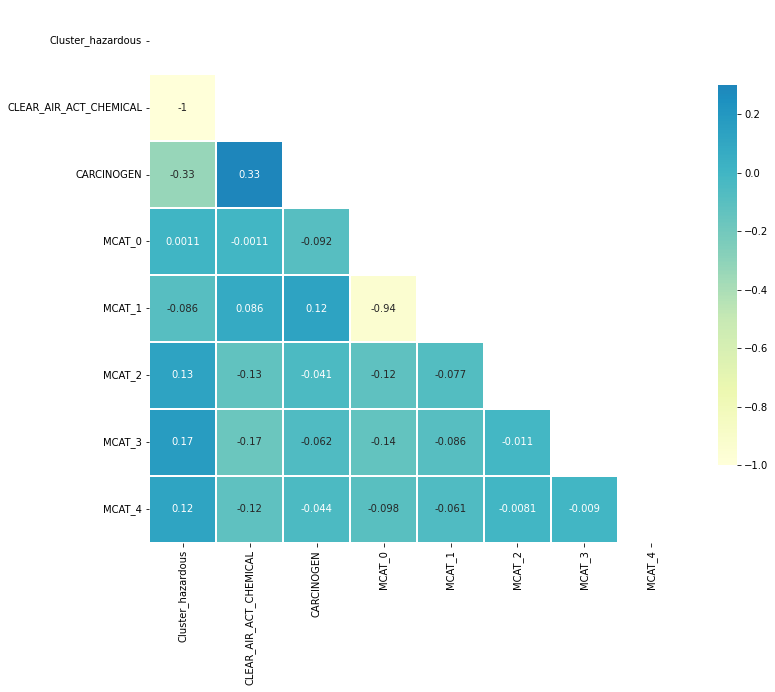

In [58]:
corr = df2.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 14))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.30, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [59]:
df3=df2.copy()

In [60]:
d = {0: 'Hazardous', 1: 'Non-Hazardous'}
df3['Cluster_hazardous']=df3['Cluster_hazardous'].map(d)

In [61]:
sum(df3['Cluster_hazardous'].isna() == True)

0

In [62]:
df3

,Cluster_hazardous,CLEAR_AIR_ACT_CHEMICAL,CARCINOGEN,MCAT_0,MCAT_1,MCAT_2,MCAT_3,MCAT_4
2,Non-Hazardous,False,False,0.0,1.0,0.0,0.0,0.0
3,Hazardous,True,False,1.0,0.0,0.0,0.0,0.0
4,Hazardous,True,False,1.0,0.0,0.0,0.0,0.0
6,Hazardous,True,False,0.0,1.0,0.0,0.0,0.0
7,Non-Hazardous,False,False,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1323389,Hazardous,True,True,0.0,1.0,0.0,0.0,0.0
1323391,Hazardous,True,False,1.0,0.0,0.0,0.0,0.0
1323392,Hazardous,True,False,1.0,0.0,0.0,0.0,0.0
1323393,Non-Hazardous,False,False,1.0,0.0,0.0,0.0,0.0


In [63]:
group_by_year = df3.groupby(['Cluster_hazardous'])
group_by_year.size()


Cluster_hazardous
Hazardous        764922
Non-Hazardous    339174
dtype: int64

In [64]:
df3

,Cluster_hazardous,CLEAR_AIR_ACT_CHEMICAL,CARCINOGEN,MCAT_0,MCAT_1,MCAT_2,MCAT_3,MCAT_4
2,Non-Hazardous,False,False,0.0,1.0,0.0,0.0,0.0
3,Hazardous,True,False,1.0,0.0,0.0,0.0,0.0
4,Hazardous,True,False,1.0,0.0,0.0,0.0,0.0
6,Hazardous,True,False,0.0,1.0,0.0,0.0,0.0
7,Non-Hazardous,False,False,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1323389,Hazardous,True,True,0.0,1.0,0.0,0.0,0.0
1323391,Hazardous,True,False,1.0,0.0,0.0,0.0,0.0
1323392,Hazardous,True,False,1.0,0.0,0.0,0.0,0.0
1323393,Non-Hazardous,False,False,1.0,0.0,0.0,0.0,0.0


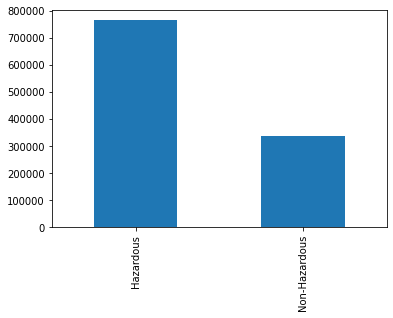

In [65]:
df3.Cluster_hazardous.value_counts().plot.bar()


In [66]:
x =df2["CLEAR_AIR_ACT_CHEMICAL"]
#y =df_2["Cluster_hazardous"]
z =df2["CARCINOGEN"]

https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

https://datascience.stackexchange.com/questions/19925/what-are-the-most-suitable-machine-learning-algorithms-according-to-type-of-data

https://www.kaggle.com/karnikakapoor/customer-segmentation-clustering

there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

In [67]:
index_values = df2.index
df = pd.concat([df, df3['Cluster_hazardous']], axis=1).reindex(df.index)


In [68]:
df

,YEAR,TRI_FACILITY_ID,FACILITY_NAME,CITY,ST,LATITUDE,LONGITUDE,FEDERAL_FACILITY,INDUSTRY_SECTOR,CHEMICAL,CAS_#/COMPOUND_ID,CLEAR_AIR_ACT_CHEMICAL,CLASSIFICATION,METAL,METAL_CATEGORY,CARCINOGEN,5.1_FUGITIVE_AIR,5.2_STACK_AIR,5.3_WATER,5.4_UNDERGROUND,5.5.1_LANDFILLS,5.5.2_LAND_TREATMENT,5.5.3_SURFACE_IMPOUNDMENT,5.5.4_OTHER_DISPOSAL,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,OFF-SITE_RECOVERY_TOTAL,OFF-SITE_TREATED_TOTAL,TOTAL_RELEASES,8.4_RECYCLING_ON-SITE,8.5_RECYCLING_OFF-SITE,8.6_TREATMENT_ON-SITE,8.7_TREATMENT_OFF-SITE,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME,Cluster_hazardous
2,2016,44691CRGLL1203T,CARGILL ANIMAL NUTRITION,WOOSTER,OH,40.784710,-81.939580,False,Food,ZINC COMPOUNDS,N982,False,TRI,True,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CARGILL INC,Non-Hazardous
3,2016,02745CSHNT215DU,ACUSHNET CO BALL PLANT III,NEW BEDFORD,MA,41.725430,-70.955170,False,Miscellaneous Manufacturing,DIISOCYANATES,N120,True,TRI,False,0,False,0,0,0,0,0,0,0,0,0,0,2191,106,0,0,0,0,106,2297,ACUSHNET HOLDINGS CORP,Hazardous
4,2016,30050CLRXC17LAK,CLOROX PRODUCTS MANUFACTURING CO,FOREST PARK,GA,33.627222,-84.386839,False,Chemicals,CERTAIN GLYCOL ETHERS,N230,True,TRI,False,0,False,5,5,0,0,0,0,0,0,10,20,0,230,50,0,0,0,230,260,THE CLOROX CO,Hazardous
6,2016,48211CDLLC2500E,GENERAL MOTORS GM VA DETROIT-HAMTRAMCK ASSEMB...,DETROIT,MI,42.381971,-83.044919,False,Transportation Equipment,NICKEL COMPOUNDS,N495,True,TRI,True,1,False,0,1,0,0,0,0,0,0,1,1080,0,0,1601,0,0,0,0,1081,GENERAL MOTORS LLC,Hazardous
7,2016,35064HNNST3812C,HANNA STEEL CORP,FAIRFIELD,AL,33.497505,-86.911426,False,Fabricated Metals,"1,2,4-TRIMETHYLBENZENE",000095636,False,TRI,False,0,False,233,222,0,0,0,0,0,0,455,28,5326,0,483,0,0,4208,0,10017,HANNA STEEL CORP,Non-Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323389,2007,01810RYTHN350LO,RAYTHEON CO,ANDOVER,MA,42.643850,-71.190170,False,Transportation Equipment,LEAD,007439921,True,PBT,True,1,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4875,0,0,4875,RAYTHEON CO,Hazardous
1323391,2007,17566BCKCXBOX23,BUCK CO INC,QUARRYVILLE,PA,39.881910,-76.231750,False,Primary Metals,TRIETHYLAMINE,000121448,True,TRI,False,0,False,43,18,0,0,0,0,0,0,61,0,0,0,61,0,0,0,0,61,DIXON VALVE & COUPLING CO,Hazardous
1323392,2007,22801STRYS500PL,AIRDYE SOLUTIONS LLC,HARRISONBURG,VA,38.391180,-78.900160,False,Printing,METHANOL,000067561,True,TRI,False,0,False,60,660,0,0,0,0,0,0,720,0,5280,0,720,48000,0,36760,0,90760,AIRDYE HOLDINGS LLC,Hazardous
1323393,2007,03062TRDYN4PITT,AMPHENOL APC INC,NASHUA,NH,42.738005,-71.489815,False,Computers and Electronic Products,FORMIC ACID,000064186,False,TRI,False,0,False,5,9.98,0,0,0,0,0,0,14.98,0,0,0,14.98,0,0,2814.04,0,2829.02,AMPHENOL CORP,Non-Hazardous


In [69]:
df.to_csv("Cleaned_TRI.csv",)


In [70]:
from google.colab import files

files.download("Cleaned_TRI.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
cleaned_df=pd.read_csv('Cleaned_TRI.csv')

In [72]:
cleaned_df.columns

Index(['Unnamed: 0', 'YEAR', 'TRI_FACILITY_ID', 'FACILITY_NAME', 'CITY', 'ST',
       'LATITUDE', 'LONGITUDE', 'FEDERAL_FACILITY', 'INDUSTRY_SECTOR',
       'CHEMICAL', 'CAS_#/COMPOUND_ID', 'CLEAR_AIR_ACT_CHEMICAL',
       'CLASSIFICATION', 'METAL', 'METAL_CATEGORY', 'CARCINOGEN',
       '5.1_FUGITIVE_AIR', '5.2_STACK_AIR', '5.3_WATER', '5.4_UNDERGROUND',
       '5.5.1_LANDFILLS', '5.5.2_LAND_TREATMENT', '5.5.3_SURFACE_IMPOUNDMENT',
       '5.5.4_OTHER_DISPOSAL', 'ON-SITE_RELEASE_TOTAL',
       'OFF-SITE_RELEASE_TOTAL', 'OFF-SITE_RECOVERY_TOTAL',
       'OFF-SITE_TREATED_TOTAL', 'TOTAL_RELEASES', '8.4_RECYCLING_ON-SITE',
       ' 8.5_RECYCLING_OFF-SITE', '8.6_TREATMENT_ON-SITE',
       '8.7_TREATMENT_OFF-SITE', 'PROD._WASTE_(8.1_THRU_8.7)',
       'PARENT_COMPANY_NAME', 'Cluster_hazardous'],
      dtype='object')

In [73]:
cleaned_df.drop(columns=['Unnamed: 0'],axis=1)

,YEAR,TRI_FACILITY_ID,FACILITY_NAME,CITY,ST,LATITUDE,LONGITUDE,FEDERAL_FACILITY,INDUSTRY_SECTOR,CHEMICAL,CAS_#/COMPOUND_ID,CLEAR_AIR_ACT_CHEMICAL,CLASSIFICATION,METAL,METAL_CATEGORY,CARCINOGEN,5.1_FUGITIVE_AIR,5.2_STACK_AIR,5.3_WATER,5.4_UNDERGROUND,5.5.1_LANDFILLS,5.5.2_LAND_TREATMENT,5.5.3_SURFACE_IMPOUNDMENT,5.5.4_OTHER_DISPOSAL,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,OFF-SITE_RECOVERY_TOTAL,OFF-SITE_TREATED_TOTAL,TOTAL_RELEASES,8.4_RECYCLING_ON-SITE,8.5_RECYCLING_OFF-SITE,8.6_TREATMENT_ON-SITE,8.7_TREATMENT_OFF-SITE,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME,Cluster_hazardous
0,2016,44691CRGLL1203T,CARGILL ANIMAL NUTRITION,WOOSTER,OH,40.784710,-81.939580,False,Food,ZINC COMPOUNDS,N982,False,TRI,True,1,False,0.0,0.00,0.0,0,0,0.0,0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,CARGILL INC,Non-Hazardous
1,2016,02745CSHNT215DU,ACUSHNET CO BALL PLANT III,NEW BEDFORD,MA,41.725430,-70.955170,False,Miscellaneous Manufacturing,DIISOCYANATES,N120,True,TRI,False,0,False,0.0,0.00,0.0,0,0,0.0,0,0.0,0.00,0.0,2191.0,106.0,0.00,0.0,0.0,0.00,106.0,2297.00,ACUSHNET HOLDINGS CORP,Hazardous
2,2016,30050CLRXC17LAK,CLOROX PRODUCTS MANUFACTURING CO,FOREST PARK,GA,33.627222,-84.386839,False,Chemicals,CERTAIN GLYCOL ETHERS,N230,True,TRI,False,0,False,5.0,5.00,0.0,0,0,0.0,0,0.0,10.00,20.0,0.0,230.0,50.00,0.0,0.0,0.00,230.0,260.00,THE CLOROX CO,Hazardous
3,2016,48211CDLLC2500E,GENERAL MOTORS GM VA DETROIT-HAMTRAMCK ASSEMB...,DETROIT,MI,42.381971,-83.044919,False,Transportation Equipment,NICKEL COMPOUNDS,N495,True,TRI,True,1,False,0.0,1.00,0.0,0,0,0.0,0,0.0,1.00,1080.0,0.0,0.0,1601.00,0.0,0.0,0.00,0.0,1081.00,GENERAL MOTORS LLC,Hazardous
4,2016,35064HNNST3812C,HANNA STEEL CORP,FAIRFIELD,AL,33.497505,-86.911426,False,Fabricated Metals,"1,2,4-TRIMETHYLBENZENE",000095636,False,TRI,False,0,False,233.0,222.00,0.0,0,0,0.0,0,0.0,455.00,28.0,5326.0,0.0,483.00,0.0,0.0,4208.00,0.0,10017.00,HANNA STEEL CORP,Non-Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104091,2007,01810RYTHN350LO,RAYTHEON CO,ANDOVER,MA,42.643850,-71.190170,False,Transportation Equipment,LEAD,007439921,True,PBT,True,1,True,0.0,0.00,0.0,0,0,0.0,0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,4875.0,0.00,0.0,4875.00,RAYTHEON CO,Hazardous
1104092,2007,17566BCKCXBOX23,BUCK CO INC,QUARRYVILLE,PA,39.881910,-76.231750,False,Primary Metals,TRIETHYLAMINE,000121448,True,TRI,False,0,False,43.0,18.00,0.0,0,0,0.0,0,0.0,61.00,0.0,0.0,0.0,61.00,0.0,0.0,0.00,0.0,61.00,DIXON VALVE & COUPLING CO,Hazardous
1104093,2007,22801STRYS500PL,AIRDYE SOLUTIONS LLC,HARRISONBURG,VA,38.391180,-78.900160,False,Printing,METHANOL,000067561,True,TRI,False,0,False,60.0,660.00,0.0,0,0,0.0,0,0.0,720.00,0.0,5280.0,0.0,720.00,48000.0,0.0,36760.00,0.0,90760.00,AIRDYE HOLDINGS LLC,Hazardous
1104094,2007,03062TRDYN4PITT,AMPHENOL APC INC,NASHUA,NH,42.738005,-71.489815,False,Computers and Electronic Products,FORMIC ACID,000064186,False,TRI,False,0,False,5.0,9.98,0.0,0,0,0.0,0,0.0,14.98,0.0,0.0,0.0,14.98,0.0,0.0,2814.04,0.0,2829.02,AMPHENOL CORP,Non-Hazardous


In [74]:
group_by_chemicals = df.groupby(['Cluster_hazardous','CITY'])
chemicals_city_count=group_by_chemicals.size().reset_index(name="Count")
type(chemicals_city_count)

pandas.core.frame.DataFrame

In [75]:
chemicals_city_count.sort_values('Count', ascending=False)


,Cluster_hazardous,CITY,Count
2189,Hazardous,HOUSTON,8982
3551,Hazardous,PASADENA,4943
2707,Hazardous,LOUISVILLE,4226
3725,Hazardous,PORT ARTHUR,3967
2488,Hazardous,LA PORTE,3923
...,...,...,...
3630,Hazardous,PFLUGERVILLE,1
3636,Hazardous,PHILOMATH,1
1624,Hazardous,FORK UNION,1
7422,Non-Hazardous,LOS ALAMOS,1


In [76]:
#Cities with most hazardous chemicals
hazardous_df = chemicals_city_count[chemicals_city_count['Cluster_hazardous'] == 'Hazardous']
NonHazardous_df = chemicals_city_count[chemicals_city_count['Cluster_hazardous'] == 'Non-Hazardous']


In [77]:
hazardous_df

,Cluster_hazardous,CITY,Count
0,Hazardous,ABBEVILLE,302
1,Hazardous,ABBOTT PARK,12
2,Hazardous,ABERDEEN,543
3,Hazardous,ABERDEEN PROVING GROUND,37
4,Hazardous,ABILENE,296
...,...,...,...
5184,Hazardous,ZELIENOPLE,50
5185,Hazardous,ZEPHYRHILLS,42
5186,Hazardous,ZION,11
5187,Hazardous,ZUMBROTA,1


In [78]:
top30HC=hazardous_df.sort_values('Count',ascending=False)[0:1000]


In [79]:
top30HC

,Cluster_hazardous,CITY,Count
2189,Hazardous,HOUSTON,8982
3551,Hazardous,PASADENA,4943
2707,Hazardous,LOUISVILLE,4226
3725,Hazardous,PORT ARTHUR,3967
2488,Hazardous,LA PORTE,3923
...,...,...,...
2340,Hazardous,JUNCTION CITY,193
3104,Hazardous,MORENCI,193
924,Hazardous,CLYATTVILLE,193
1188,Hazardous,DELTA JUNCTION,193


In [80]:
!pip install geopy

In [81]:
from collections import Counter
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="App")
state=[]
coordinates=[]
country=[]
for ind,item in enumerate(top30HC['CITY']):
    location=''
    location = geolocator.geocode(item, addressdetails=True,exactly_one=True, timeout=60)
    if location is not None:
        #state.append(location.raw['address']['state'])
        if 'lon' in location.raw:
          coordinates.append((location.raw['lon'],location.raw['lat']))
      
           
print(country)
Counter(country)


[]


Counter()

In [82]:
coordinates

[('-95.3676974', '29.7589382'),
 ('-118.1444779', '34.1476452'),
 ('-85.759407', '38.2542376'),
 ('-93.9288723', '29.8988618'),
 ('-95.0193729', '29.6657838'),
 ('-83.0007065', '39.9622601'),
 ('-97.3942053', '27.7951482'),
 ('-91.18738', '30.4459596'),
 ('-81.6934446', '41.5051613'),
 ('-91.2342744', '30.2890833'),
 ('-77.43428', '37.5385087'),
 ('-88.0814651', '42.1608585'),
 ('-90.0516285', '35.1490215'),
 ('-86.1583502', '39.7683331'),
 ('-94.5781416', '39.100105'),
 ('-89.6212271', '42.2966861'),
 ('-92.6662674', '33.20763'),
 ('-101.3353895', '35.3636563'),
 ('-94.9774274', '29.7355047'),
 ('-95.9929113', '36.1556805'),
 ('-122.6741949', '45.5202471'),
 ('-94.1018461', '30.0860459'),
 ('-84.5124602', '39.1014537'),
 ('-75.546589', '39.7459468'),
 ('-88.9524151', '39.8454163'),
 ('-94.9175485', '29.396013'),
 ('-81.655651', '30.3321838'),
 ('-89.6439575', '39.7990175'),
 ('-87.6244212', '41.8755616'),
 ('-90.1847691', '32.2990021'),
 ('-102.0103767', '31.83688'),
 ('-82.458444', '

In [83]:
new_df_coords_count =top30HC

In [84]:
new_df_coords_count['Coordinates']=coordinates

In [85]:
new_df_coords_count

,Cluster_hazardous,CITY,Count,Coordinates
2189,Hazardous,HOUSTON,8982,"(-95.3676974, 29.7589382)"
3551,Hazardous,PASADENA,4943,"(-118.1444779, 34.1476452)"
2707,Hazardous,LOUISVILLE,4226,"(-85.759407, 38.2542376)"
3725,Hazardous,PORT ARTHUR,3967,"(-93.9288723, 29.8988618)"
2488,Hazardous,LA PORTE,3923,"(-95.0193729, 29.6657838)"
...,...,...,...,...
2340,Hazardous,JUNCTION CITY,193,"(-96.8313978, 39.0286093)"
3104,Hazardous,MORENCI,193,"(-84.2173964, 41.7195109)"
924,Hazardous,CLYATTVILLE,193,"(-83.3151501, 30.691594)"
1188,Hazardous,DELTA JUNCTION,193,"(-145.732157, 64.0373478)"


In [96]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 25.7 MB/s 
     |████████████████████████████████| 15.4 MB 41.6 MB/s 


In [98]:
import geopandas as gpd

geoJSON_df = gpd.read_file("counties.json")
geoJSON_df.head()

,id,geometry
0,0500000US01001,"POLYGON ((-86.49932 32.34394, -86.71470 32.402..."
1,0500000US01009,"POLYGON ((-86.57112 33.76632, -86.75060 33.841..."
2,0500000US01017,"POLYGON ((-85.17117 32.86797, -85.13527 32.771..."
3,0500000US01021,"POLYGON ((-86.53522 33.02305, -86.49932 32.926..."
4,0500000US01033,"POLYGON ((-88.15055 34.57911, -88.15055 34.589..."


In [ ]:
# Import libraries
import folium
import os 
import plotly.express as px

# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('', 'us-states.json')
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data

# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
folium.Choropleth(
 #geo_data='counties.json',
 geo_data = state_geo,
 name='choropleth',
 data=new_df_coords_count,
 columns=['CITY', 'Count'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=1,
 line_opacity=0.2,
 legend_name='Hazardous Areas'
).add_to(m)
# folium.LayerControl().add_to(m)
# m
# # Save to html
# m.save('output.html')
m

In [110]:
# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


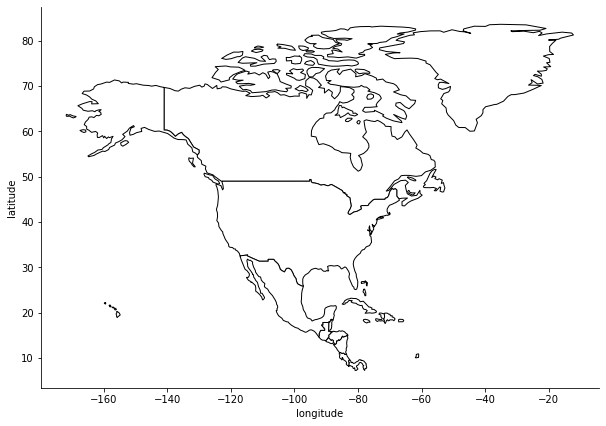

In [112]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("continent == 'North America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [125]:
from shapely.geometry import Point
newresult = []
for tuple in new_df_coords_count["Coordinates"]:
    temp = []
    for x in tuple:

        if x.isdigit():
            temp.append(int(x))
        else:
            temp.append(float(x))
    newresult.append((temp[0],temp[1]))
new_df_coords_count["Coordinates_"]=newresult
type(new_df_coords_count['Coordinates_'][0][1])


float

In [145]:
new_df_coords_count["Coordinates_"] = new_df_coords_count["Coordinates_"].apply(Point)
new_df_coords_count.head()
gdf = gpd.GeoDataFrame(new_df_coords_count, geometry="Coordinates_")[0:15]
gdf.head()

,Cluster_hazardous,CITY,Count,Coordinates,Coordinates_
2189,Hazardous,HOUSTON,8982,"(-95.3676974, 29.7589382)",POINT (-95.36770 29.75894)
3551,Hazardous,PASADENA,4943,"(-118.1444779, 34.1476452)",POINT (-118.14448 34.14765)
2707,Hazardous,LOUISVILLE,4226,"(-85.759407, 38.2542376)",POINT (-85.75941 38.25424)
3725,Hazardous,PORT ARTHUR,3967,"(-93.9288723, 29.8988618)",POINT (-93.92887 29.89886)
2488,Hazardous,LA PORTE,3923,"(-95.0193729, 29.6657838)",POINT (-95.01937 29.66578)


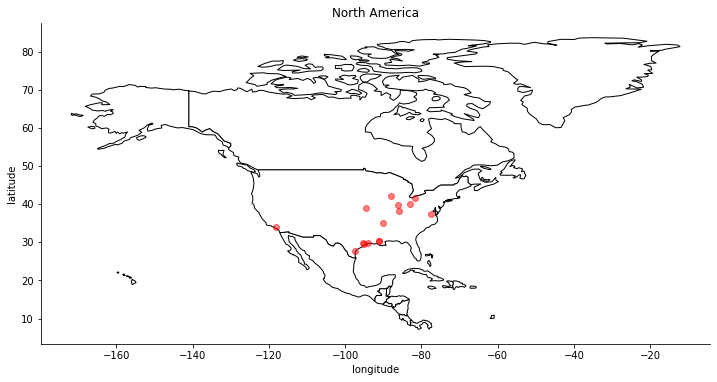

In [146]:
# Step 3: Plot the cities onto the map

# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(12,14))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("continent == 'North America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.

gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('North America')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

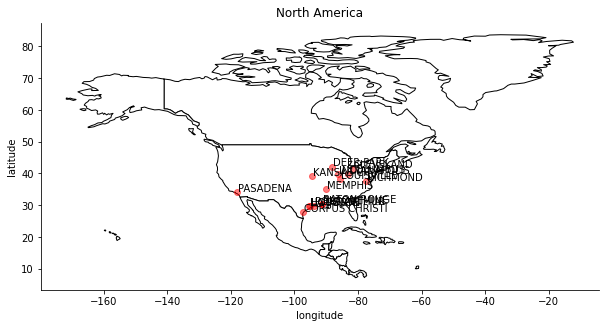

In [148]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well, South America.
world.query("continent == 'North America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame. I want the
# cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('North America')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
# plt.axis('off')


# Label the cities
for x, y, label in zip(gdf['Coordinates_'].x, gdf['Coordinates_'].y, gdf['CITY']):
    gax.annotate(label, xy=(x,y), xytext=(1,1), textcoords='offset points')

plt.show()

In [144]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json
#Convert data to geojson for bokeh
geojson=new_df_coords_count.to_json()
wi_geojson=GeoJSONDataSource(geojson)

/usr/local/lib/python3.7/dist-packages/pandas/io/json/_json.py:166: ShapelyDeprecationWarning:

The 'array_interface_base' property is deprecated and will be removed in Shapely 2.0.

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumen

OverflowError: ignored

In [143]:
color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0, high = 1)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('County','@county')])
p = figure(title="Wisconsin Voting in 2016 Presidential Election", tools=[hover])
p.patches("xs","ys",source=gdf,
          fill_color = {'field' :'rel_trump_share', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "rel_trump_share", key "xs" value "xs", key "ys" value "ys" [renderer: GlyphRenderer(id='1054', ...)]


TypeError: ignored